<a href="https://colab.research.google.com/github/pierrot73/GenAIBootCamp/blob/Bootcamp/W3_D4_Mini_Project_day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10608 non-null  object 
 1   Open       10608 non-null  float64
 2   High       10608 non-null  float64
 3   Low        10608 non-null  float64
 4   Close      10608 non-null  float64
 5   Adj Close  10608 non-null  float64
 6   Volume     10608 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 580.3+ KB
None
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
               Open          High           Low         Close     Adj Close  \
count  10608.000000  10608.000000  10608.000000  10608.000000  10608.000000   
mean      16.689173     16.879955     16.500822     16.697

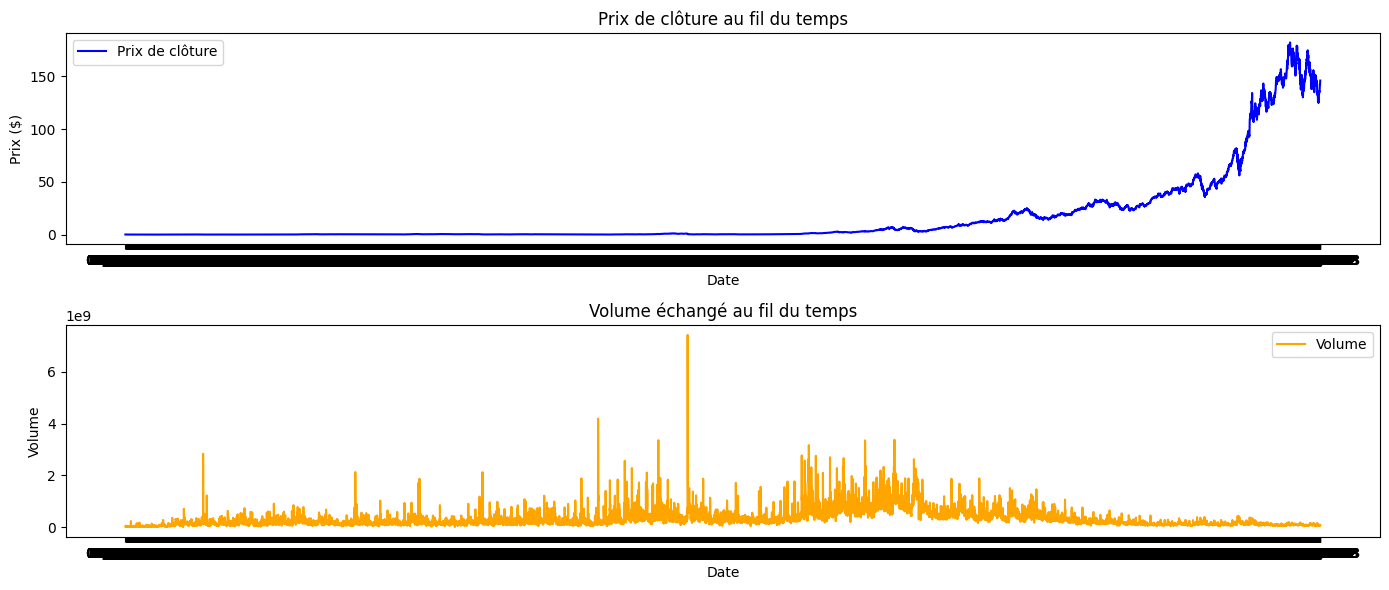

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [23]:

# Apple Stock Data Analysis Project
from google.colab import drive
drive.mount('/content/drive')
#pip install mplfinance
# 1. Data Loading and Exploration
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Apple_Stock_Prices.csv')
df.head()
# Initial inspection
print(df.info())
print(df.isnull().sum())
print(df.describe())

# Infer frequency
#print(pd.infer_freq(df.index))

# 2. Data Visualization
# Closing Prices
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
plt.plot(df['Date'], df['Close'], label='Prix de clôture', color='blue')
plt.title("Prix de clôture au fil du temps")
plt.xlabel("Date")
plt.ylabel("Prix ($)")
plt.legend()
plt.subplot(2,1,2)
plt.plot(df['Date'], df['Volume'], label='Volume', color='orange')
plt.title("Volume échangé au fil du temps")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.tight_layout()
plt.show()
# Création manuelle d'un graphique en chandelier (candlestick) sans mplfinance
# Préparer les données
#df_ohlc = df[['Date', 'Open', 'High', 'Low','Adj Close', 'Close']].copy()
#df_ohlc['Date_num'] = df_ohlc['Date'].map(mdates.date2num)
df_ohlc = df[['Date', 'Open', 'High', 'Low', 'Close']].copy()
df_ohlc['Date_num'] = df_ohlc['Date'].map(mdates.date2num)
# Volume
plt.figure(figsize=(14, 5))
plt.bar(df.index, df['Volume'], width=1.0, color='gray')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# Candlestick Chart
mpf.plot(df[['Open', 'High', 'Low', 'Close', 'Volume']], type='candle', style='yahoo', volume=True, title='Candlestick Chart')

# 3. Statistical Analysis
# Summary statistics
stats_summary = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].describe()
print(stats_summary)

# Moving Average
df['MA_20'] = df['Close'].rolling(window=20).mean()
df[['Close', 'MA_20']].plot(figsize=(14, 5), title='Closing Price and 20-Day Moving Average')
plt.grid(True)
plt.show()

# 4. Hypothesis Testing
# Add Year column for grouping
df['Year'] = df.index.year
close_2020 = df[df['Year'] == 2020]['Close']
close_2021 = df[df['Year'] == 2021]['Close']

# T-test
ttest_result = stats.ttest_ind(close_2020.dropna(), close_2021.dropna(), equal_var=False)
print(f"T-test result (2020 vs 2021): T-statistic = {ttest_result.statistic:.4f}, P-value = {ttest_result.pvalue:.4f}")

# Daily Returns and Normality
df['Daily_Return'] = df['Close'].pct_change()
plt.hist(df['Daily_Return'].dropna(), bins=50, edgecolor='black')
plt.title('Distribution of Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

stat, p_value = stats.normaltest(df['Daily_Return'].dropna())
print(f"Normality Test: Statistic = {stat:.4f}, P-value = {p_value:.4f}")

# 5. Advanced Statistical Techniques (Bonus)
# NumPy Convolution for Moving Average
weights = np.ones(20) / 20
df['MA_20_conv'] = np.convolve(df['Close'], weights, mode='same')

# Correlation: Close vs Volume
corr = np.corrcoef(df['Close'].dropna(), df['Volume'].dropna())[0, 1]
print(f"Correlation between Close and Volume: {corr:.4f}")

# Correlation between MA of Close and Volume
df['Volume_MA_20'] = df['Volume'].rolling(20).mean()
corr_ma = df[['MA_20', 'Volume_MA_20']].corr().iloc[0, 1]
print(f"Correlation between 20-day MA of Close and Volume: {corr_ma:.4f}")

# 6. Summary and Insights
# (To be written in markdown or as comments in the final notebook)

# 7. Reflection
# (Include discussion on challenges like missing data, frequency inference, noisy prices, and how each was handled.)
